# Exploratory Data Analysis - CryptoRank

Importando bibliotecas essenciais

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

In [4]:
df_cryptorank = pd.read_csv('cryptoranktable.csv')

In [5]:
df_cryptorank

,Unnamed: 0,Name,Price,Sale Price,Market Cap,Raise,ROI USD,ATH ROI USD,Type,TGE Platform,Ended,Category
0,0,EdgeSwapEGS,$ 0.117,$ 0.015,$ 6.64M,"$ 150,000",7.81x,15.75x,IEO,Huobi Global,7 Apr,Exchange
1,1,EdgeSwapEGS,$ 0.117,$ 0.015,$ 6.64M,"$ 70,000",7.81x,15.75x,IEO,Gate.io,7 Apr,Exchange
2,2,Drunk RobotsMETAL,$ 0.0559,$ 0.01,$ 1.05M,"$ 150,000",5.59x,6.90x,IEO,Gate.io,7 Apr,Gaming
3,3,WinerzWNZ,Not Set,$ 0.02,Not Set,"$ 500,000",NaN,NaN,IDO,SolRazr,7 Apr,Gaming
4,4,WinerzWNZ,Not Set,$ 0.02,Not Set,"$ 500,000",NaN,NaN,IDO,Not Set,7 Apr,Gaming
...,...,...,...,...,...,...,...,...,...,...,...,...
3249,3249,TealTokenTEAT,$ 0.00996,$ 1.25,Not Set,"$ 4,500,000",0.01x,1.49x,IEO,Probit,Not Set,Marketplace
3250,3250,InfomatixINFO,$ 0.00232,$ 0.005,Not Set,"$ 125,000",0.46x,7.22x,IDO,ZeeDO,Not Set,Data
3251,3251,WadzPayWTK,$ 0.361,$ 0.07,Not Set,"$ 50,000",5.16x,6.00x,IEO,BitMart,Not Set,Financial
3252,3252,iBetYouIBY,$ 0.0193,$ 0.0914,Not Set,"$ 130,650",0.21x,0.25x,IDO,MISO,Not Set,Gambling


In [7]:
df_cryptorank = df_cryptorank.drop('Unnamed: 0', 1)

/var/folders/ct/hz49ts_123q0xjdwrm22m8400000gn/T/ipykernel_3291/3991478484.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_cryptorank = df_cryptorank.drop('Unnamed: 0', 1)


KeyError: "['Unnamed: 0'] not found in axis"

In [8]:
df_cryptorank

,Name,Price,Sale Price,Market Cap,Raise,ROI USD,ATH ROI USD,Type,TGE Platform,Ended,Category
0,EdgeSwapEGS,$ 0.117,$ 0.015,$ 6.64M,"$ 150,000",7.81x,15.75x,IEO,Huobi Global,7 Apr,Exchange
1,EdgeSwapEGS,$ 0.117,$ 0.015,$ 6.64M,"$ 70,000",7.81x,15.75x,IEO,Gate.io,7 Apr,Exchange
2,Drunk RobotsMETAL,$ 0.0559,$ 0.01,$ 1.05M,"$ 150,000",5.59x,6.90x,IEO,Gate.io,7 Apr,Gaming
3,WinerzWNZ,Not Set,$ 0.02,Not Set,"$ 500,000",NaN,NaN,IDO,SolRazr,7 Apr,Gaming
4,WinerzWNZ,Not Set,$ 0.02,Not Set,"$ 500,000",NaN,NaN,IDO,Not Set,7 Apr,Gaming
...,...,...,...,...,...,...,...,...,...,...,...
3249,TealTokenTEAT,$ 0.00996,$ 1.25,Not Set,"$ 4,500,000",0.01x,1.49x,IEO,Probit,Not Set,Marketplace
3250,InfomatixINFO,$ 0.00232,$ 0.005,Not Set,"$ 125,000",0.46x,7.22x,IDO,ZeeDO,Not Set,Data
3251,WadzPayWTK,$ 0.361,$ 0.07,Not Set,"$ 50,000",5.16x,6.00x,IEO,BitMart,Not Set,Financial
3252,iBetYouIBY,$ 0.0193,$ 0.0914,Not Set,"$ 130,650",0.21x,0.25x,IDO,MISO,Not Set,Gambling


In [9]:
df_cryptorank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254 entries, 0 to 3253
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          3254 non-null   object
 1   Price         3254 non-null   object
 2   Sale Price    3254 non-null   object
 3   Market Cap    3254 non-null   object
 4   Raise         3254 non-null   object
 5   ROI USD       3092 non-null   object
 6   ATH ROI USD   3092 non-null   object
 7   Type          3254 non-null   object
 8   TGE Platform  3223 non-null   object
 9   Ended         3254 non-null   object
 10  Category      3171 non-null   object
dtypes: object(11)
memory usage: 279.8+ KB


In [10]:
df_cryptorank.nunique()

Name            2004
Price           1445
Sale Price       547
Market Cap      1548
Raise            822
ROI USD          574
ATH ROI USD     1410
Type               3
TGE Platform     106
Ended            903
Category          44
dtype: int64

In [14]:
df_cryptorank.sort_values(by='Name')

,Name,Price,Sale Price,Market Cap,Raise,ROI USD,ATH ROI USD,Type,TGE Platform,Ended,Category
2880,0chainZCN,$ 0.528,$ 1.40,$ 25.57M,"$ 39,000,000",0.38x,1.90x,ICO,Not Set,16 Jan 2018,Cloud
3121,0x ProtocolZRX,$ 0.802,$ 0.048,$ 680.02M,"$ 24,000,000",16.72x,52.74x,ICO,Not Set,15 Aug 2017,Exchange
1893,0x_NODESBIOS,$ 1.90,$ 5.00,$ 718.81K,"$ 500,000",0.38x,4.55x,IDO,CyberFi,16 May 2021,Blockchain
2643,0xcert ProtocolZXC,$ 0.0014,$ 0.0473,$ 581.07K,"$ 9,450,000",0.03x,0.98x,ICO,Not Set,3 Jul 2018,Protocol
468,11MinutesELVN,Not Set,$ 0.0285,Not Set,"$ 220,000",NaN,NaN,IDO,Infinity Pad,6 Jan,Gaming
...,...,...,...,...,...,...,...,...,...,...,...
66,ritestreamRITE,$ 0.0314,$ 0.04,$ 428.15K,"$ 199,500",0.79x,1.55x,IDO,FireStarter,22 Mar,Entertainment
879,xHashtagXTAG,$ 0.235,$ 0.250,$ 423.05K,"$ 50,000",0.94x,17.87x,IEO,Gate.io,29 Nov 2021,DeFi
928,xHashtagXTAG,$ 0.235,$ 0.250,$ 423.05K,"$ 250,000",0.94x,17.87x,IDO,SolRazr,25 Nov 2021,DeFi
1652,xNFT ProtocolXNFT,$ 0.0113,$ 0.800,Not Set,"$ 20,000",0.01x,0.69x,IDO,WeStarter,29 Jul 2021,Non-Fungible


In [31]:
# How many IDOs and ICOs each coin did?

df_cryptorank.groupby('Name')['Name'].count().sort_values(ascending=False)

Name
SolchicksCHICKS        15
Cheesus DeFiCHEESUS    12
Animal ConcertsANML     9
Gari NetworkGARI        9
Nomad ExilesPRIDE       7
                       ..
Hat.ExchangeHAT         1
HashNet BitEcoHNB       1
HarmonyONE              1
Hara TokenHART          1
​​AxelarAXL             1
Name: Name, Length: 2004, dtype: int64

In [49]:
df_cryptocount = df_cryptorank.groupby(by = ['Name', 'Type'])[['Name', 'Type']].count().rename(columns={'Name': 'Name_Count', 'Type': 'Type_Count'})
df_cryptocount = df_cryptocount.sort_values(by= ['Name_Count', 'Type_Count'], ascending = False)
df_cryptocount.describe()

,Name_Count,Type_Count
count,2210.000000,2210.000000
mean,1.472398,1.472398
std,0.971485,0.971485
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,15.000000,15.000000


<AxesSubplot:ylabel='Count'>

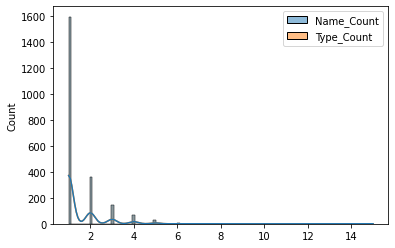

In [90]:
sns.histplot(df_cryptocount, kde=True)

In [99]:
df_cryptocount[df_cryptocount['Name_Count'] != 1]

,,Name_Count,Type_Count
Name,Type,,
SolchicksCHICKS,IDO,15,15
Cheesus DeFiCHEESUS,IDO,12,12
Animal ConcertsANML,IDO,8,8
Endless BattlefieldEB,IDO,7,7
Nomad ExilesPRIDE,IDO,7,7
...,...,...,...
ZKCHAOS CHAOS,IDO,2,2
Zombie World ZZWZ,IDO,2,2
izumi FinanceIZI,IDO,2,2


 - Existem 2210 projetos diferentes na base de dados com 3254 IDOs/ICOs/IEOs
 - 1593 projetos fizeram somente um IDO, ou um ICO, ou um IEO - ou tambem pode ser que fizeram um IDO, e apos um tempo um IEO para arrecadar mais capital e entrar num exchange grande
 - 617 projetos fizeram o IDO em diferentes plataformas, no geral finalizando sempre no mesmo dia. o maximo foi o projeto Solschick com o IDO em 15 plataformas diferentes, mas a media tende a ser muito menor (1,4), sendo a mediana igual a 1

In [102]:
# Quantas categorias temos e quantos projetos pertencem a cada categoria? Para isso vamos eliminar a repeticao de projetos e usar so 1

df_cryptocount_2 = df_cryptorank.groupby(by = 'Name').nunique()


In [115]:
df_cryptocount_2[df_cryptocount_2.sort_values(by= 'Category')['Category'] == 1]

/var/folders/ct/hz49ts_123q0xjdwrm22m8400000gn/T/ipykernel_3291/866189680.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cryptocount_2[df_cryptocount_2.sort_values(by= 'Category')['Category'] == 1]


,Price,Sale Price,Market Cap,Raise,ROI USD,ATH ROI USD,Type,TGE Platform,Ended,Category
Name,,,,,,,,,,
0chainZCN,1,1,1,1,1,1,1,1,1,1
0x ProtocolZRX,1,1,1,1,1,1,1,1,1,1
0x_NODESBIOS,1,1,1,1,1,1,1,1,1,1
0xcert ProtocolZXC,1,1,1,1,1,1,1,1,1,1
11MinutesELVN,1,1,1,2,0,0,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...
reBakedBAKED,1,1,1,1,1,1,1,1,1,1
ritestreamRITE,1,1,1,2,1,1,1,2,2,1
xHashtagXTAG,1,1,1,2,1,1,2,2,2,1


In [122]:
df_cryptorank.groupby(by = 'Category').nunique().sort_values(by = 'Name', ascending = False)

,Name,Price,Sale Price,Market Cap,Raise,ROI USD,ATH ROI USD,Type,TGE Platform,Ended
Category,,,,,,,,,,
Gaming,401,351,137,339,196,236,366,3,74,263
DeFi,367,333,165,315,204,204,373,3,73,313
Blockchain,325,300,184,277,221,181,320,3,72,313
Financial,105,99,80,88,83,68,102,3,35,119
Exchange,71,69,53,62,62,57,70,3,40,81
Non-Fungible,66,63,47,58,56,59,75,3,44,82
Trading,60,57,48,48,52,41,60,3,22,68
Marketplace,49,49,39,42,43,29,48,3,27,56
Social,46,41,45,35,38,31,45,3,24,56


 - 1922 projetos tem categoria.
 - 82 projetos nao tem categoria (simplesmente vazio, nem sequer seria 'Not Set')
 - As categorias com mais projetos seriam 'Gaming - 401', 'DeFi - 367', 'Blockchain - 325', 'Financial - 105', 'Exchange - 71' - as outras 39 categorias sao muito fragmentadas.

# GENERAL DATA CLEANING - CryptoRank

In [123]:
df_cryptorank

,Name,Price,Sale Price,Market Cap,Raise,ROI USD,ATH ROI USD,Type,TGE Platform,Ended,Category
0,EdgeSwapEGS,$ 0.117,$ 0.015,$ 6.64M,"$ 150,000",7.81x,15.75x,IEO,Huobi Global,7 Apr,Exchange
1,EdgeSwapEGS,$ 0.117,$ 0.015,$ 6.64M,"$ 70,000",7.81x,15.75x,IEO,Gate.io,7 Apr,Exchange
2,Drunk RobotsMETAL,$ 0.0559,$ 0.01,$ 1.05M,"$ 150,000",5.59x,6.90x,IEO,Gate.io,7 Apr,Gaming
3,WinerzWNZ,Not Set,$ 0.02,Not Set,"$ 500,000",NaN,NaN,IDO,SolRazr,7 Apr,Gaming
4,WinerzWNZ,Not Set,$ 0.02,Not Set,"$ 500,000",NaN,NaN,IDO,Not Set,7 Apr,Gaming
...,...,...,...,...,...,...,...,...,...,...,...
3249,TealTokenTEAT,$ 0.00996,$ 1.25,Not Set,"$ 4,500,000",0.01x,1.49x,IEO,Probit,Not Set,Marketplace
3250,InfomatixINFO,$ 0.00232,$ 0.005,Not Set,"$ 125,000",0.46x,7.22x,IDO,ZeeDO,Not Set,Data
3251,WadzPayWTK,$ 0.361,$ 0.07,Not Set,"$ 50,000",5.16x,6.00x,IEO,BitMart,Not Set,Financial
3252,iBetYouIBY,$ 0.0193,$ 0.0914,Not Set,"$ 130,650",0.21x,0.25x,IDO,MISO,Not Set,Gambling


In [147]:
5.2 + 5.3

10.5

In [148]:
5,3 +5,2

(5, 8, 2)

In [161]:
df_test = pd.read_csv('cryptoranktable_220410.csv', sep = ";", decimal = ",")

In [162]:
df_test

,Name,Price,Sale Price,Market Cap,Raise,ROI USD,ATH ROI USD,Type,TGE Platform,Ended,Category
0,EdgeSwapEGS,0.1170,0.0150,6640000.0,150.000,7.81,15.75,IEO,Huobi Global,2022-04-07,Exchange
1,EdgeSwapEGS,0.1170,0.0150,6640000.0,70.000,7.81,15.75,IEO,Gate.io,2022-04-07,Exchange
2,Drunk RobotsMETAL,0.0559,0.0100,1050000.0,150.000,5.59,6.90,IEO,Gate.io,2022-04-07,Gaming
3,WinerzWNZ,NaN,0.0200,NaN,500.000,NaN,NaN,IDO,SolRazr,2022-04-07,Gaming
4,WinerzWNZ,NaN,0.0200,NaN,500.000,NaN,NaN,IDO,NaN,2022-04-07,Gaming
...,...,...,...,...,...,...,...,...,...,...,...
3249,TealTokenTEAT,0.0100,1.2500,NaN,4.500.000,0.01,1.49,IEO,Probit,NaN,Marketplace
3250,InfomatixINFO,0.0023,0.0050,NaN,125.000,0.46,7.22,IDO,ZeeDO,NaN,Data
3251,WadzPayWTK,0.3610,0.0700,NaN,50.000,5.16,6.00,IEO,BitMart,NaN,Financial
3252,iBetYouIBY,0.0193,0.0914,NaN,130.650,0.21,0.25,IDO,MISO,NaN,Gambling
